### import statements

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Directory

In [2]:
os.listdir()

['Degrees_Info.csv',
 'Interest_Info.csv',
 '_Population_Interest.csv',
 'Student_Activity_Info.csv',
 '_Population_Interest.xlsx',
 'Activity_Info.csv',
 'Affiliation_Info.csv',
 'DS CAA analysis.ipynb',
 'CAA_Membership_Info.csv',
 'Sports_Info.csv',
 'Gifts_Info_2000_and_Before.csv',
 'Gift_Club_Info.csv',
 'Gifts_Info_2001_2010.csv',
 'Awards_Honors_Info.csv',
 'Prospect_Info.csv',
 'Gifts_Info_2011_and_After.csv',
 '.ipynb_checkpoints',
 'Committee_Info.csv',
 'Biographical_Info.csv']

### Analysis

In [3]:
pop_interest = pd.read_csv(os.listdir()[2])
pop_interest.head()

,entity_id,segment
0,2,CAA Donor
1,3,CAA Donor
2,4,CAA Donor
3,7,CAA Donor
4,16,CAA Donor


In [4]:
bio_info = pd.read_csv(os.listdir()[-1])

In [5]:
# Only consider last 3 years 2018-2020

bio_2018 = bio_info[bio_info['date_added'].str.contains('2018')]
bio_2019 = bio_info[bio_info['date_added'].str.contains('2019')]
bio_2020 = bio_info[bio_info['date_added'].str.contains('2020')]

bio_last_2018_2020 = bio_2018.append(bio_2019).append(bio_2020)

# Dropping extraneous columns
columns_to_drop_bio = ['record_status_code', 'record_status_desc']
bio_last_2018_2020 = bio_last_2018_2020.drop(columns = columns_to_drop_bio)
bio_last_2018_2020 = bio_last_2018_2020.reset_index().drop(columns='index')
bio_last_2018_2020.head()

,entity_id,first_name,last_name,person_or_org,gender_code,date_added,record_type_code,record_type_desc,ungrad_degree_holder_flg,graduate_degree_holder_flg,...,primary_city,primary_state_code,primary_zipcode,primary_county_desc,primary_country_desc,primary_foreign_cityzip,primary_email_address,prim_hm_phone_10_digit,busi_phone_10_digit,mobile_phone_number
0,3433437,Dimyana,Abdelmalek,P,F,2018-01-01 00:00:00,IN,Friend (Non-Alum),NaN,NaN,...,Redwood City,CA,94063-1866,"San Mateo, CA",NaN,,dimyana.abdelmalek@gmail.com,510-338-8681,NaN,510-338-8681
1,3433522,James,Pagliaro,P,M,2018-01-02 12:48:55,IN,Friend (Non-Alum),NaN,NaN,...,Rydal,PA,19046-2509,"Montgomery, PA",NaN,,jimpagliaro1@gmail.com,215-292-5332,NaN,215-292-5332
2,3433536,Carolyn,Rohrer,P,F,2018-01-02 14:09:12,IN,Friend (Non-Alum),NaN,NaN,...,San Francisco,CA,94116-1303,"San Francisco, CA",NaN,,Carolyn_rohrer@hotmail.com,NaN,NaN,NaN
3,3433635,Bruce,Barth,P,M,2018-01-03 12:46:32,IN,Friend (Non-Alum),NaN,NaN,...,Washington,DC,20002-1590,"District Of Columbia, DC",NaN,,NaN,703-994-2315,NaN,703-994-2315
4,3433670,Anjali,Englund,P,F,2018-01-03 15:37:14,IN,Friend (Non-Alum),NaN,NaN,...,Berkeley,CA,94704-2818,"Alameda, CA",NaN,,NaN,NaN,NaN,NaN


In [6]:
student_activity = pd.read_csv(os.listdir()[3])
student_activity.head()

,entity_id,student_activity_code,student_activity_desc,student_particip_code,student_particip_desc,activity_office_code,activity_office_desc,start_dt,stop_dt
0,3,GAOI,Alpha Omicron Pi,P,Participated,,NaN,NaN,NaN
1,4,GSCF,Sigma Chi Fraternity,P,Participated,,NaN,NaN,NaN
2,4,USPS,Assoc Students Of Pretrial Svcs,P,Participated,,NaN,NaN,NaN
3,4,RHI6,1963-72 I-House Resident,P,Participated,,NaN,NaN,NaN
4,4,RHIH,International House Resident,P,Participated,,NaN,NaN,NaN


In [7]:
student_activity_bio = pd.DataFrame.merge(bio_last_2018_2020, student_activity, on='entity_id')
student_activity_bio = pd.DataFrame.merge(student_activity_bio, pop_interest, on='entity_id')
student_activity_bio.head()

,entity_id,first_name,last_name,person_or_org,gender_code,date_added,record_type_code,record_type_desc,ungrad_degree_holder_flg,graduate_degree_holder_flg,...,mobile_phone_number,student_activity_code,student_activity_desc,student_particip_code,student_particip_desc,activity_office_code,activity_office_desc,start_dt,stop_dt,segment
0,3436815,Divi,Schmidt,P,F,2018-02-12 04:44:36,UA,Attendee: Undergrad,N,N,...,NaN,UWSE,Women In Science And Engineering,P,Participated,,NaN,2018-08-01 00:00:00,2018-12-31 00:00:00,CAA Engaged Alumni in 2018
1,3436828,Melanie,Campos,P,F,2018-02-12 04:44:36,ST,Current Student,N,N,...,NaN,LCSC,SLCT-Sciences,P,Participated,,NaN,2018-08-01 00:00:00,2018-12-31 00:00:00,CAA Engaged Alumni in 2018
2,3436828,Melanie,Campos,P,F,2018-02-12 04:44:36,ST,Current Student,N,N,...,NaN,MSMB,UC Marching Band Member,P,Participated,,NaN,2018-08-01 00:00:00,NaN,CAA Engaged Alumni in 2018
3,3436831,Marita,Jimenez,P,F,2018-02-12 04:44:36,ST,Current Student,N,N,...,NaN,UEFPF,Fall Program for Freshmen,P,Participated,,NaN,2018-05-21 00:00:00,NaN,CAA Engaged Alumni in 2018
4,3437256,Conrad,Ehlers,P,M,2018-02-19 06:17:38,UA,Attendee: Undergrad,N,N,...,NaN,BXBC,Berkeley Connect,P,Participated,ME,Mentee,2018-08-01 00:00:00,2018-12-31 00:00:00,CAA Engaged Alumni in 2018


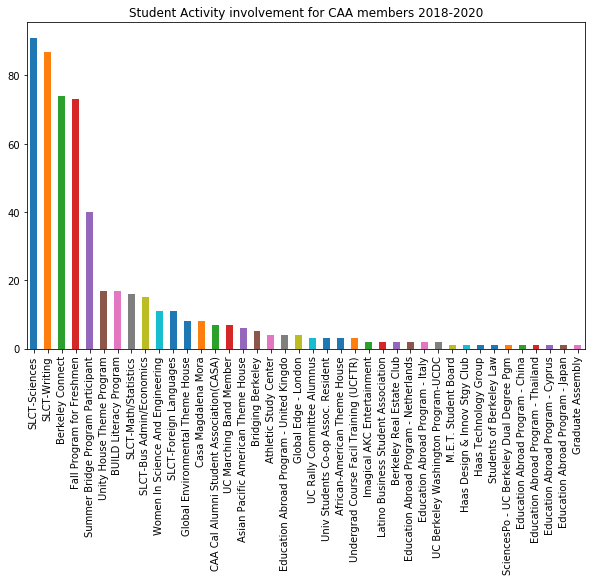

In [8]:
student_activity_bio['student_activity_desc'].value_counts().plot(kind='bar',
                                                                  figsize=(10,6),
                                                                  title='Student Activity involvement for CAA members 2018-2020')

##### Not relevant information, but just for keepsakes

In [9]:
gifts_info = pd.read_csv('Gifts_Info_2001_2010.csv').append(pd.read_csv('Gifts_Info_2011_and_After.csv'))
gifts_info.head()

,entity_id,gift_receipt_date,gift_year_of_giving,gift_associated_amount,gift_associated_credit_amt,gift_associated_allocation,gift_associated_desc,gift_transaction_desc,gift_payment_type,gift_payment_desc,...,gift_appeal_description,pledge_payment_ind,gift_entity_type,gift_entity_desc,gift_associated_campaign,gift_associated_campaign_desc,gift_alloc_dept_code,gift_alloc_dept_desc,gift_alloc_school,gift_alloc_school_desc
0,2,2000-12-16 00:00:00,2001,5000.0,5000.0,FN1201000,Primary Donor,Gift,C,Check,...,Major Gift ($5K or more),N,AG,Alum: Grad,COUCX,*Ongoing Sup-General,BUS,Business,GBU,*Business-School of
1,2,2001-08-08 00:00:00,2002,0.0,50.0,R08676000,Joint,Gift,C,Check,...,*DONOTUSE Memorial gift,N,AG,Alum: Grad,CPOUU,*Undergrad Scholarships,TENNIS,Tennis - Men's & Women's,GAT,*Intercollegiate Athletics
2,2,2001-12-11 00:00:00,2002,5000.0,5000.0,FN1201000,Primary Donor,Gift,C,Check,...,Major Gift ($5K or more),N,AG,Alum: Grad,COUCX,*Ongoing Sup-General,BUS,Business,GBU,*Business-School of
3,2,2002-03-25 00:00:00,2002,0.0,25.0,R44668000,Joint,Gift,C,Check,...,Unsolicited/Unknown,N,AG,Alum: Grad,CPOUU,*Undergrad Scholarships,ATYMW,*Athletics - Men's & Women's,GAT,*Intercollegiate Athletics
4,2,2002-12-16 00:00:00,2003,5000.0,5000.0,FN1201000,Primary Donor,Gift,C,Check,...,Major Gift ($5K or more),N,AG,Alum: Grad,COUCX,*Ongoing Sup-General,BUS,Business,GBU,*Business-School of


In [10]:
highest_gift_donation = gifts_info[gifts_info['gift_associated_desc'] == 'Primary Donor'].groupby('entity_id').sum()[['gift_associated_amount']].reset_index().sort_values('gift_associated_amount', ascending=False)
highest_gift_donation.head()

,entity_id,gift_associated_amount
110408,2004957,1.588831e+08
110903,2085953,6.482578e+07
110457,2007693,6.438540e+07
110581,2013733,5.818475e+07
114649,3091678,5.357000e+07


### Findings

For CAA members from 2018-2020, the top 5 student activity involvement were in order:

    SLCT-Sciences
    SLCT-Writing
    Fall Program for Freshmen
    Berkeley Connect
    Summer Bridge Program Participants

### Hypothesis Testing

Why do we use hypothesis testing? Hypothesis testing allows us to confirm our claims/hypothesis by checking our test statistic against sample data and seeing if we reject our null hypothesis.

As hypothesis testing utilizes a comparison on a test statistic and sample data, we would like to see whether the top five student activities are indeed significant student activities.

Hypothesis claims:

$\textbf{Null Hypothesis}$: The activity specified was not a significant activity of interest among CAA members from 2018-2020

$\textbf{Alternative Hypothesis}$: The activity specified  was a significant activity of interest among CAA members from 2018-2020

Testing method: bootstrap samples w/ uniform prior (uniform is best in this case as it does not have any bias towards any one student activity) and see if these five activities are statistically significant

In [11]:
test_mu = student_activity_bio['student_activity_desc'].value_counts().mean()

In [12]:
student_activities_counts = pd.DataFrame(student_activity_bio['student_activity_desc'].value_counts())

In [13]:
student_activities_counts

,student_activity_desc
SLCT-Sciences,91
SLCT-Writing,87
Berkeley Connect,74
Fall Program for Freshmen,73
Summer Bridge Program Participant,40
Unity House Theme Program,17
BUILD Literacy Program,17
SLCT-Math/Statistics,16
SLCT-Bus Admin/Economics,15
Women In Science And Engineering,11


In [14]:
def hypothesis_test(test_statistic, n=1000):
    bootstrap_reject = 0
    
    for i in range(n):
        # generate sample w/ replacement
        sample = np.array(student_activities_counts.sample(n=len(student_activities_counts),replace=True)['student_activity_desc'])
        
        # 95% confidence interval
        bottom_interval = np.mean(sample) - 2*np.std(sample)
        top_interval = np.mean(sample) + 2*np.std(sample)
        if test_statistic >= bottom_interval and test_statistic <= top_interval:
            bootstrap_reject += 1
    
    #returns p-value
    return bootstrap_reject/n

In [15]:
hypothesis_test(91)

0.004

In [16]:
hypothesis_test(87)

0.016

In [17]:
hypothesis_test(74)

0.134

In [18]:
hypothesis_test(73)

0.143

In [19]:
hypothesis_test(40)

0.911

In [20]:
hypothesis_test(1)

1.0

In [21]:
hyptest = np.vectorize(hypothesis_test)
p_values = hyptest(np.arange(101))

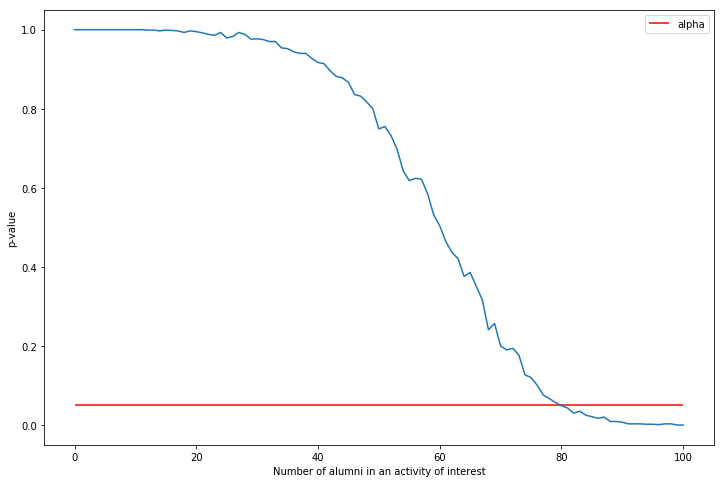

In [22]:
plt.figure(figsize=(12,8))
plt.plot(p_values)
plt.hlines(0.05, xmin=0, xmax=100, color='r', label='alpha')
plt.legend()
plt.xlabel('Number of alumni in an activity of interest')
plt.ylabel('p-value')
plt.title('P-value')
plt.show()

#### Conclusions:

Through bootstrapped samples, we find that only SLCT-Sciences and SLCT_Writing had rejected the null hypothesis and thus claim that they are significant activities of interest among CAA members from 2018-2020.

Alpha = 0.05 and the hypothesis tests show that an activity with at least about 80 interested members renders the activity to be an activity of interest.

In [23]:
80 / sum(student_activities_counts['student_activity_desc'])

0.14842300556586271

NOTE: This number is only relevant to the specific amount of alumni from 2018-2020. A percentage is more valuable in this context; however, the difference between 80 and 81 and 82 are drastic and a percentage is thus not the most optimal statistic of interest.